## Multilayer Perceptron Classification of MNIST

An look into Neural Networks by using MLP to classify the EMNIST-digits dataset.


## Initial Setup and Imports

In [1]:
# Common imports
import sys
import os
import sklearn
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Loading, reviewing and splitting data


In [2]:
trainpath = "C:/datasets/EMNIST/archive/emnist-digits-train.csv"
testpath = "C:/datasets/EMNIST/archive/emnist-digits-test.csv"

trainset = pd.read_csv(trainpath).to_numpy()
testset = pd.read_csv(testpath).to_numpy()

In [3]:
#training digits
y_training = np.array(trainset[10000:,0])
x_training = np.array(trainset[10000:,1:])
#testing digits
y_test = np.array(testset[:,0])
x_test = np.array(testset[:,1:])
#validation digits
y_valid = np.array(trainset[:10000,0])
x_valid = np.array(trainset[:10000,1:])

In [4]:
#normalizing the data
x_training = x_training / 255.
x_test = x_test / 255.
x_valid = x_valid / 255.

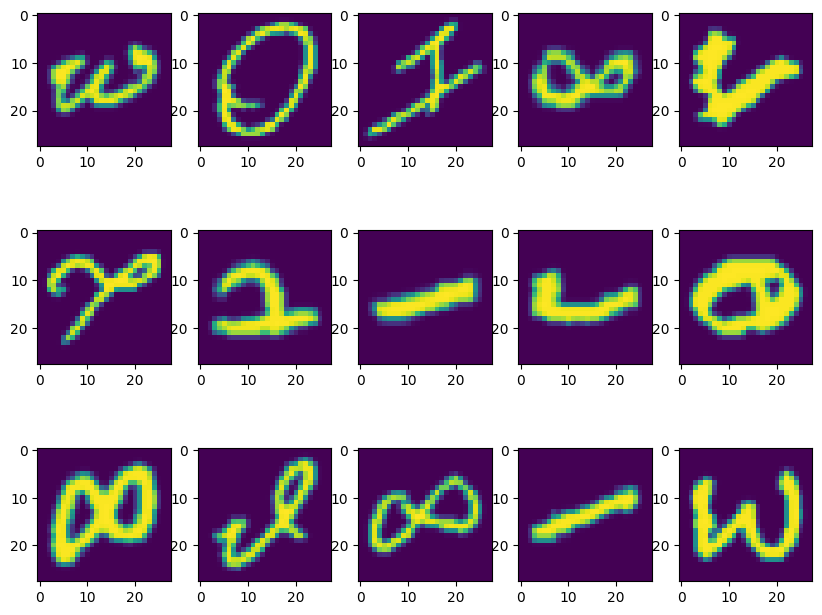

In [5]:
#show the data for review
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x_training[i].reshape([28,28]))

# Creating the model using Sequential API

In [6]:
model = keras.models.Sequential()
# Input layer:
# A "Flatten" layer converts each input image into a 1-dimensional array.
model.add(keras.layers.Flatten(input_shape=[784]))

# Hidden layers:
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

# Output layer.
# Since it is multiclass classification, we should use the softmax activation function.
model.add(keras.layers.Dense(10, activation="softmax"))

In [7]:
#Show info of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


# Compiling and Training the model

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [9]:
#Running the model
history = model.fit(x_training, y_training, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
7188/7188 [==============================] - 12s 2ms/step - loss: 0.3089 - accuracy: 0.9176 - val_loss: 0.1777 - val_accuracy: 0.9508
Epoch 2/10
7188/7188 [==============================] - 11s 2ms/step - loss: 0.1383 - accuracy: 0.9611 - val_loss: 0.1253 - val_accuracy: 0.9658
Epoch 3/10
7188/7188 [==============================] - 11s 2ms/step - loss: 0.1041 - accuracy: 0.9705 - val_loss: 0.0983 - val_accuracy: 0.9709
Epoch 4/10
7188/7188 [==============================] - 11s 2ms/step - loss: 0.0860 - accuracy: 0.9756 - val_loss: 0.0849 - val_accuracy: 0.9769
Epoch 5/10
7188/7188 [==============================] - 11s 2ms/step - loss: 0.0743 - accuracy: 0.9789 - val_loss: 0.0776 - val_accuracy: 0.9782
Epoch 6/10
7188/7188 [==============================] - 11s 2ms/step - loss: 0.0658 - accuracy: 0.9814 - val_loss: 0.0725 - val_accuracy: 0.9800
Epoch 7/10
7188/7188 [==============================] - 12s 2ms/step - loss: 0.0596 - accuracy: 0.9831 - val_loss: 0.0653 - val_ac

# Review and Evaluate model

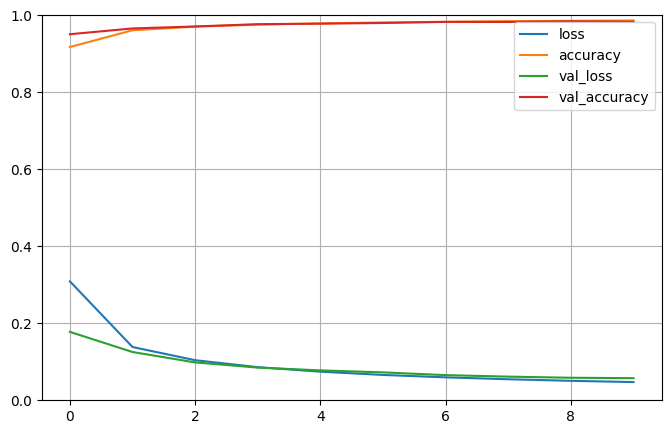

In [10]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
model.evaluate(x_test, y_test)

1250/1250 [==============================] - 2s 1ms/step - loss: 0.0516 - accuracy: 0.9840


[0.05160018429160118, 0.9839745759963989]

In [12]:
# predictions without probabilities.
X_new = x_test[:3]
y_pred = model.predict(X_new)
classes=np.argmax(y_pred,axis=1)
classes

1/1 [==============================] - 0s 75ms/step


array([9, 7, 9], dtype=int64)

In [13]:
# Check if the predictions were correct.
y_new = y_test[:3]
y_new

array([9, 7, 9], dtype=int64)

# Tuning hyperparameters

In [14]:
# builds and compiles a Keras model.
def build_model(n_hidden=1, n_neurons=100, learning_rate=3e-3, input_shape=[784]):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)
    return model

In [15]:
# Wrap the Keras model in a Scikit-Learn KerasRegressor.
keras_classifier = keras.wrappers.scikit_learn.KerasClassifier(build_model)

C:\Users\WøbbePC\AppData\Local\Temp\ipykernel_5012\162082958.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [16]:
# We have to split the dataset into a smaller chunk, since it crashes our pc's otherwise
y_param = np.array(trainset[:100000,0])
x_param = np.array(trainset[:100000,1:])
x_param = x_param / 255.

In [17]:
from sklearn.model_selection import RandomizedSearchCV

# sets and ranges to explore
param_distribs = {
    "n_hidden": [1, 2, 3, 4, 5],
    "n_neurons": [100, 200, 300],
}

rnd_search_cv = RandomizedSearchCV(keras_classifier, param_distribs, n_iter=10, cv=3, n_jobs=-1, verbose=2)
rnd_search_cv.fit(x_param, y_param, epochs=50,
                  validation_data=(x_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\WøbbePC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Epoch 1/50
3125/3125 [==============================] - 6s 2ms/step - loss: 0.5419 - val_loss: 0.2242
Epoch 2/50
3125/3125 [==============================] - 5s 2ms/step - loss: 0.1759 - val_loss: 0.1429
Epoch 3/50
3125/3125 [==============================] - 5s 2ms/step - loss: 0.1296 - val_loss: 0.1097
Epoch 4/50
3125/3125 [==============================] - 5s 2ms/step - loss: 0.1065 - val_loss: 0.0936
Epoch 5/50
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0915 - val_loss: 0.0816
Epoch 6/50
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0800 - val_loss: 0.0724
Epoch 7/50
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0717 - val_loss: 0.0663
Epoch 8/50
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0645 - val_loss: 0.0590
Epoch 9/50
3125/3125 [==============================] - 5s 1ms/step - loss: 0.0586 - val_loss: 0.0757
Epoch 10/50
3125/3125 [==============================] - 5s 2ms/step - loss: 0.053

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000013BFDCCBF40>,
                   n_jobs=-1,
                   param_distributions={'n_hidden': [1, 2, 3, 4, 5],
                                        'n_neurons': [100, 200, 300]},
                   verbose=2)

In [18]:
# Display the parameters of the best model.
rnd_search_cv.best_params_

{'n_neurons': 100, 'n_hidden': 4}

In [19]:
# Display loss output of optimized model
best_model = rnd_search_cv.best_estimator_.model
best_model.evaluate(x_training, y_training)

7188/7188 [==============================] - 9s 1ms/step - loss: 0.0536


0.05357915908098221

In [21]:
# Evaluate the model's accuracy:
from sklearn.metrics import accuracy_score

y_pred = rnd_search_cv.predict(x_training)
accuracy_score(y_training, y_pred)

7188/7188 [==============================] - 9s 1ms/step


0.990095609111344